# Loading

In [1]:
# code formatting
# this makes our code more consistent and readable
%load_ext lab_black

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# setting up matplotlib and seaborn parameters
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
sns.set_palette("tab10")

# suppres unnecessary warnings!
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
# necessary libraries for modelling part
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from lightgbm import LGBMClassifier
import optuna

# suppres every trials output during optimization with optuna!
optuna.logging.set_verbosity(optuna.logging.WARNING)

## Get familiar with datasets
In this section, we will load datasets, familiarize ourselves with them and look for potential errors.

In [4]:
# load all datasets
try:
    contract = pd.read_csv("final_provider/contract.csv")
    internet = pd.read_csv("final_provider/internet.csv")
    personal = pd.read_csv("final_provider/personal.csv")
    phone = pd.read_csv("final_provider/phone.csv")
    print("Datasets has been uploaded successfully!")
except:
    print("Something went wrong! Check your dataset path, extension. etc.")

Datasets has been uploaded successfully!


In [5]:
# dictionary of dataframes for easy manipulation of them
dfs = {"contract": contract, "internet": internet, "personal": personal, "phone": phone}

In [6]:
# function to explore datasets
def df_analyzer(df):
    """shows first 3 rows, info and sum of missing values of a df"""
    print("*" * 15 + " Head 3 rows of the Dataframe " + "*" * 15)
    display(df.head(3))
    print("")
    print("*" * 15 + " Info of the Dataframe " + "*" * 15)
    display(df.info())
    print("")
    print("*" * 15 + " Missing values of the Dataframe by column " + "*" * 15)
    print("Number of total missing values in the df is", df.isna().sum().sum())


# apply the function to the dataframes
for df in dfs.keys():
    print("=" * 25 + " Information about " + df + " dataset " + "=" * 25)
    df_analyzer(dfs[df])
    print()

========================= Information about contract dataset =========================
*************** Head 3 rows of the Dataframe ***************


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15



*************** Info of the Dataframe ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None


*************** Missing values of the Dataframe by column ***************
Number of total missing values in the df is 0

========================= Information about internet dataset =========================
*************** Head 3 rows of the Dataframe ***************


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No



*************** Info of the Dataframe ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None


*************** Missing values of the Dataframe by column ***************
Number of total missing values in the df is 0

========================= Information about personal dataset =========================
*************** Head 3 rows of the Dataframe ***************


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No



*************** Info of the Dataframe ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None


*************** Missing values of the Dataframe by column ***************
Number of total missing values in the df is 0

========================= Information about phone dataset =========================
*************** Head 3 rows of the Dataframe ***************


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No



*************** Info of the Dataframe ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None


*************** Missing values of the Dataframe by column ***************
Number of total missing values in the df is 0



In [7]:
# check if the number of churned and remained customers are equal
contract["EndDate"].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

## Conclusion

We have loaded 4 datasets about the customers of the telecom operator. Each dataset stores different information about customers. But in total, there is **7043** customer in total according to ```contract``` and ```personal``` datasets.
Fortunately, none of the datasets has missing values. However, we have several issues  and we will deal with them as following:
- all column names should be lowercase and each word should be separated with an underscore;
- in the description of data it was mentioned that data was collected up to February 2020, so we can map "No" values of the `Enddate` column with `2020-02-01` for further feature creation;
- data types of each column should be checked:
    - if they contain a date, then they should be converted to `DateTime` type of Pandas;
    - `TotalCharges` column of `contract` dataframe loaded as `object` datatype. It should be `float`
- map "Yes" and "No" with 1 and 0 for efficiency and consistency;
- add new features:
    - if a customer is still using or left (separate than end_date column);
    - if a customer is using any of `internet` services, i.e. has internot or no;
    - total `internet` service is using (used);
    - if a customer is using `phone` service;
    - how long customers using or used the operator;
- concatenate all four data frames into one (use `personal` or `contract` df as the main one);
- deal with newly created missing values, explain the strategy;

# Preprocessing
Now we will deal aforementioned problems with our data, to make it clean and ready for machine learning models.

## Column names

In [8]:
# function to deal with column names
def column_name_lower(df):
    """makes all column names lowercase and split each word with underscore"""
    col_list = df.columns.tolist()
    for col_name in col_list:
        col_name_list = re.findall("[A-Z][a-z]*", col_name)
        lower_col_name_list = [i.lower() for i in col_name_list]
        new_col_name = "_".join(lower_col_name_list)
        if (
            len(new_col_name) > 3
        ):  # this is for some columns like "customerID", "gender"
            df.rename(columns={col_name: new_col_name}, inplace=True)
    return df


# apply above function to each df
for df in dfs.keys():
    column_name_lower(dfs[df])

# check the result for one df
dfs["contract"].columns

Index(['customerID', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

Now column names look more consistent and easier to read them. 

## Data types of columns

Before converting date-containing columns, let's first change "No" in the `end_date` column with "2020-02-01" so every row in this column will contain dates. We have chosen "2020-02-01", because, in the description of the dataset, it was mentioned that data is valid as of February 2020.

In [9]:
# data was provided until Febraury 2020, so we can map "No" values in "end_date" to feruary 2020
# later we we create new features from this column
contract["end_date"] = np.where(
    contract["end_date"] == "No", "2020-02-01", contract["end_date"]
)

# correct the data types of datetime columns
contract[["begin_date", "end_date"]] = contract[["begin_date", "end_date"]].apply(
    pd.to_datetime, format="%Y-%m-%d", errors="coerce"
)

# view the changes
contract.head(2)

,customerID,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.5


`total_charges` column contains numbers, as we have seen from the head of the tables. But its data type was `object`. Most probably, it contains some strange values or it was loaded as an `object` type just by mistake. let's figure out this, we will try to convert it to `float` data type. If this does not work, then we will collect information about problematic observations.

In [10]:
try:
    contract["total_charges"] = contract["total_charges"].astype(float)
except:
    # if error happens during converting to float data type then track it as follow:
    count = 0
    list_of_index = []
    for index, value in enumerate(contract["total_charges"].tolist()):
        try:
            float(value)
        except:
            count += 1
            list_of_index.append(index)
    print(f"Number of total problematic rows is {count}.")
    print("Some of the problematic rows are as follow:")
    display(contract.iloc[list_of_index, :].head(2))

Number of total problematic rows is 11.
Some of the problematic rows are as follow:


,customerID,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,


It seems like that all fresh customers, who just registered or `begin_date` = '2020-02-01', has an empty `total_charges` value. Let's check if this hypothesis is correct!

In [11]:
# check if `customerID` of all problematic rows are same with customer who begin to use telecom on 2020-02-01
problematic_rows = set(contract.iloc[list_of_index, 0])
fresh_customer = set(contract[contract["begin_date"] == "2020-02-01"]["customerID"])
if problematic_rows == fresh_customer:
    print("All problematic rows are corresponds to just registered customers!")

All problematic rows are corresponds to just registered customers!


We find that our hypothesis is correct. Now it is very simple, we can just copy values from the `monthly_charges` column to the `total_charges` column, in the problematic rows. Since they are new, they just made one payment.

In [12]:
# copy values of monthly_chagres to total_charges for the problematic rows
contract.loc[list_of_index, "total_charges"] = contract.loc[
    list_of_index, "monthly_charges"
]

# and change to data type of the column to float
contract["total_charges"] = contract["total_charges"].astype(float)

## Map “Yes” or “No” with 1 and 0

Most columns contain "Yes" or "No" values, but some contain 1 or 0. Let's make them consistent. However, if we convert them to 1 and 0, it will be easier for us to make some feature engineering in the future.

In [13]:
# function to convert yes and no to 1 and zero, respectively
def yes_no_one_zero(df):
    """if a column of df contains either 'Yes' or 'No', then they will be replaced with 1 and 0 , respectively"""
    for col in df:
        if ("Yes" in df[col].values) and ("No" in df[col].values):
            df[col] = pd.Series(np.where(df[col].values == "Yes", 1, 0))
    return df


# apply the function to all datasets
for df in dfs.keys():
    yes_no_one_zero(dfs[df])

# check one of the datasets
internet.head(3)

,customerID,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies
0,7590-VHVEG,DSL,0,1,0,0,0,0
1,5575-GNVDE,DSL,1,0,1,0,0,0
2,3668-QPYBK,DSL,1,1,0,0,0,0


## Create new features

First, we will create new features for the `contract` dataset. One of them will show us whether a customer is still using the operator services or left. While another feature will show us how long was a customer used the services of the operator. 

In [16]:
# create still using column
contract["still_using"] = np.where(contract["end_date"] == "2020-02-01", 1, 0)
# contract['still_using'] = contract['still_using'].astype('category')

# create a new feature which shows since how long a customer is using/used operator
contract["using_since_months"] = round(
    (contract["end_date"] - contract["begin_date"]) / np.timedelta64(1, "M"), 1
)
contract.head(3)

,customerID,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,still_using,using_since_months
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,1,Electronic check,29.85,29.85,1,1.0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,0,Mailed check,56.95,1889.50,1,34.0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,0,2.0


Now we will create new columns in `internet` and `phone` data frames, which contain only ones. When we concatenate our data frames, the customer who uses neither `internet` nor `phone` will be NaN value. Then we will fill NaN values with zero. That means, if the customer has any internet service, it has 1, otherwise 0. Same for the `phone`.
Also, that would be nice to make a new feature which shows total internet services.

In [17]:
# create a new feature "has_internet"
internet["has_internet"] = np.ones(len(internet)).astype(int)

# create total_int_services columns
internet["total_int_service"] = internet.apply(
    lambda x: x.tolist().count(1), axis=1
)  # since DSL, fiber optic is also internet service, we will add to one

# create new feature "has_landline"
phone["has_landline"] = np.ones(len(phone)).astype(int)

## Concatanation of dataframes

We have 4 different data frames. Now it is time to combine them all into one. We will use `contract table as the main one, and merge all other tables on it using left join.

In [18]:
# merge datasets
df = contract.merge(internet, on="customerID", how="left")
df = df.merge(personal, on="customerID", how="left")
df = df.merge(phone, on="customerID", how="left")

# fill newly produced missing values with 0 (whcih means "No")
df = df.fillna(0)

# observe the new master dataframe
df.sample(3)

,customerID,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,still_using,using_since_months,...,streaming_t_v,streaming_movies,has_internet,total_int_service,gender,senior_citizen,partner,dependents,multiple_lines,has_landline
4701,5956-YHHRX,2018-05-01,2020-02-01,Month-to-month,1,Electronic check,104.35,2271.85,1,21.1,...,1.0,1.0,1.0,5.0,Male,1,0,0,1.0,1.0
3067,7005-CCBKV,2019-04-01,2019-10-01,Month-to-month,1,Electronic check,84.40,556.35,0,6.0,...,0.0,1.0,1.0,3.0,Male,0,0,0,0.0,1.0
1904,3143-ILDAL,2015-05-01,2020-01-01,Month-to-month,1,Electronic check,94.45,5124.60,0,56.1,...,0.0,1.0,1.0,4.0,Male,0,0,0,1.0,1.0


## Conclusion

Following data preprocessing steps have been performed:
- Name of columns have been converted to lowercase and each word is separated with an underscore, eg. `EndDate` => `end_date`
- Data type of several columns have been changed:
    - `end_date` and `begin_date` columns were set up as `datetime` data type
    - `total_charges` column was loaded as an `object` type, due to the several empty rows in that column (11 rows in total). This issue was due to that these customers were recently registered to the operator (`begin_date` = '2020-02-01'). So these rows were filled with `monthly_charges`.
- most of the columns were containing "Yes-No" pair, some containing a "1-0" pair. So to make them consistent and easy for future calculations, all "yes-no" pairs have been converted to "1-0" pairs.
- several new columns were created:
    - `still_using` - shows whether a customer still using the operator or leave
    - `using_since_months`  shows how long a customer used/using the operator
    - `has_landline` shows whether a customer has a landline or no
    - `has_internet` shows whether a customer using any of the internet services
    - `total_int_service` shows total internet services a customer is using
- all four data frames have been merged into one and all newly created NaN values filled with zero, which resembles No.

# Exploratory data analysis
According to our preliminary observation of data frames, we were curious about the following data characteristics:
- Distribution of monthly charges, total charges, and lifetime of being a customer (all grouped by still using or churned customers)
- Contract type of customers grouped by has internet or no for still using or churned customers;
- Correlation plot of numerical columns
- Counts of churned and still using customers

## Distribution plots of monthly charges, total charges and lifetime of being a customer

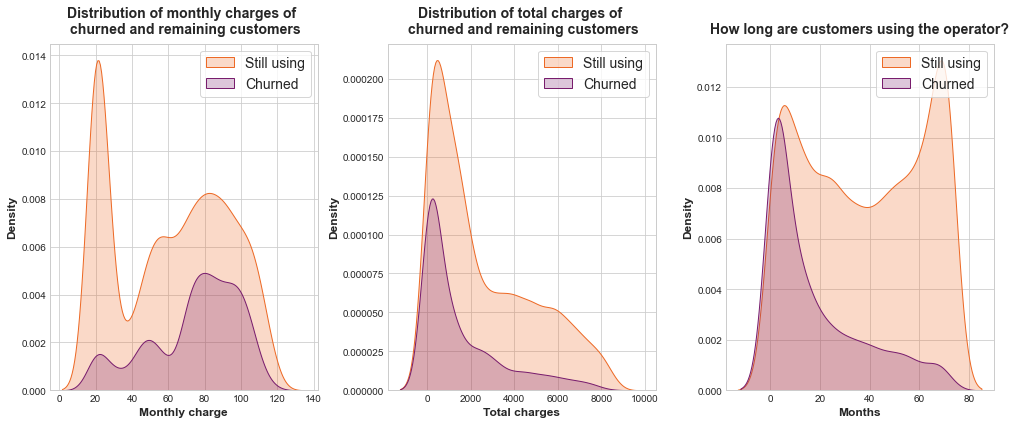

In [17]:
# distribution plots
plt.figure(figsize=(14, 6))
plt.subplot(131)

# distribution of monthly charges
sns.kdeplot(df["monthly_charges"], shade=True, hue=df["still_using"], palette="inferno")
plt.title("Distribution of monthly charges of \n churned and remaining customers")
plt.xlabel("Monthly charge")
plt.legend(
    ["Still using", "Churned"],
    frameon=True,
    loc="best",
    bbox_to_anchor=(1, 1),
    fontsize=14,
)

# distribution of total charges
plt.subplot(132)
sns.kdeplot(df["total_charges"], shade=True, hue=df["still_using"], palette="inferno")
plt.xlabel("Total charges")
plt.title("Distribution of total charges of \n churned and remaining customers")
plt.legend(
    ["Still using", "Churned"],
    frameon=True,
    loc="best",
    bbox_to_anchor=(1, 1),
    fontsize=14,
)


# distibution of lifetime of being a customer
plt.subplot(133)
sns.kdeplot(
    df["using_since_months"], shade=True, hue=df["still_using"], palette="inferno"
)
plt.xlabel("Months")
plt.title("How long are customers using the operator?")
plt.legend(
    ["Still using", "Churned"],
    frameon=True,
    loc="best",
    bbox_to_anchor=(1, 1),
    fontsize=14,
)
plt.show()

The above distributions have shown that monthly charges of "still_using" customers are bimodal, with most of the customers at a lower monthly charge range. While "churned" customers have a multimodal distribution and **most of the churned customers are in the higher monthly charge range.**

Regarding the distribution of total charges, both "still_using" and "churned" customers have a similar distribution, where more customers are located at a lower total charge range. This is because of the lifetime of being a customer, as explained below.

When we look at the lifetime of being a customer, we can see that **more fresh customers are more likelt to churn**.

## Contract type and internet status of churned and still using customers

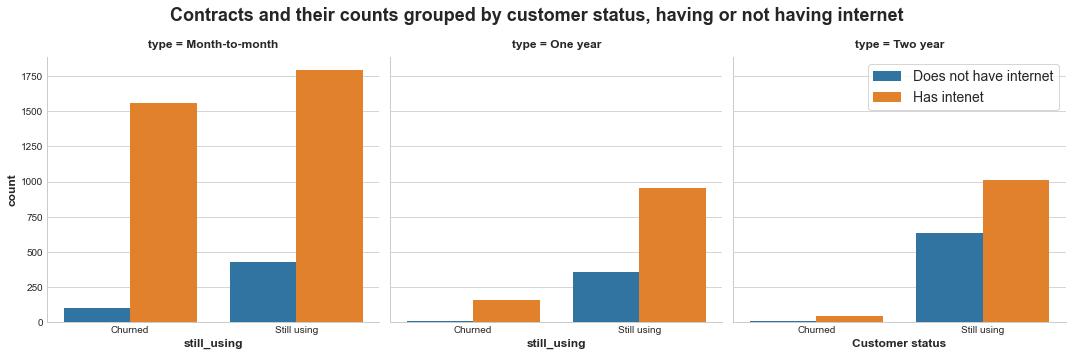

In [18]:
# contract type chart
sns.catplot(
    data=df,
    x="still_using",
    col="type",
    hue="has_internet",
    kind="count",
    legend=False,
)
plt.suptitle(
    "Contracts and their counts grouped by customer status, having or not having internet",
    fontsize=18,
    weight="bold",
)
plt.xlabel("Customer status")
plt.xticks([0, 1], ["Churned", "Still using"])
plt.legend(["Does not have internet", "Has intenet"], fontsize=14, frameon=True)
plt.show()

Depending on the contract type, we can see that **most of the customers, regardless of whether they have internet or not, are using the month-to-month contract type**. And interesting thing is that, **on month-to-month contract type, the number of churned and still using customers is almost the same**. That means customers with month-to-month contract types are not so loyal. They can leave anytime.

## Correlation of numerical columns and count of churned and still using customers

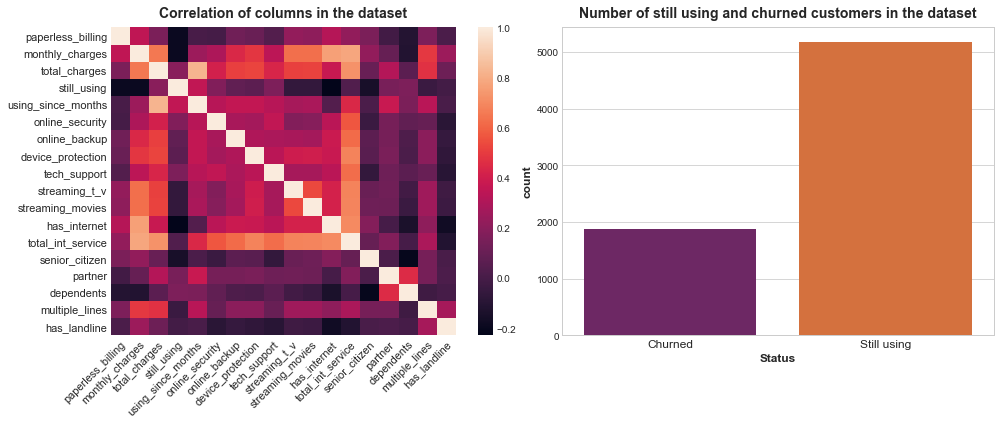

In [19]:
# correlation of columns
matrix = df.corr()

# plot of correlations
plt.figure(figsize=(14, 6))
plt.subplot(121)
sns.heatmap(matrix)
plt.title("Correlation of columns in the dataset")
plt.xticks(rotation=45, ha="right", rotation_mode="anchor", fontsize=11)
plt.yticks(fontsize=11)

# check for the balance of class in the target column
plt.subplot(122)
sns.countplot(df["still_using"], palette="inferno")
plt.title("Number of still using and churned customers in the dataset")
plt.xlabel("Status")
plt.xticks([0, 1], ["Churned", "Still using"], fontsize=12)
plt.show()

The correlation chart shows that the **correlation of columns is not too high**. But there are some **exceptions, such as `monthly_charges` vs `total_int_service` or `monthly_charges` vs `has_internet`**, which means customers who has internet or uses more internet services are more likely to have a higher monthly payments. **Another example for highly correlated columns is `total_charges` vs `using_since_months`, this is quite normal that when a customer uses the operator for a long time, then its monthly charges accumulate, yielding higher total charges**.

Regarding the number of **customers who are still using or have already left, we see that their numbers differ almost 3 folds**. That means, our project is an **imbalanced classification task**.

## Customers with internet analysis

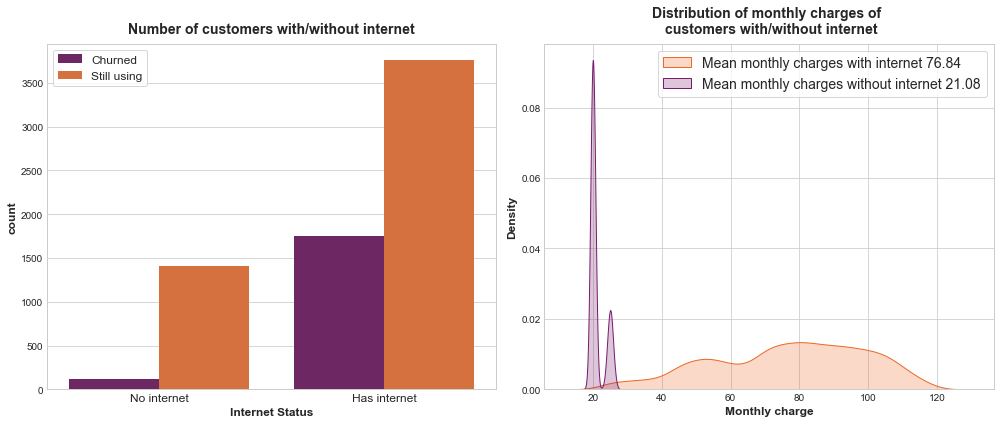

In [20]:
plt.figure(figsize=(14, 6))
# check for the balance of class in the target column
plt.subplot(121)
sns.countplot(df["has_internet"], hue=df["still_using"], palette="inferno")
plt.title("Number of customers with/without internet")
plt.xlabel("Internet Status")
plt.legend(["Churned", "Still using"], fontsize=12, frameon=True)
plt.xticks([0, 1], ["No internet", "Has internet"], fontsize=12)


# distribution of monthly charges
plt.subplot(122)
sns.kdeplot(
    df["monthly_charges"], shade=True, hue=df["has_internet"], palette="inferno"
)
plt.title("Distribution of monthly charges of \n customers with/without internet")
plt.xlabel("Monthly charge")
plt.legend(
    [
        f"Mean monthly charges with internet {df[df['has_internet'] == 1]['monthly_charges'].mean():.2f}",
        f"Mean monthly charges without internet {df[df['has_internet'] == 0]['monthly_charges'].mean():.2f}",
    ],
    frameon=True,
    loc="best",
    bbox_to_anchor=(1, 1),
    fontsize=14,
)

plt.show()

As we see from the above charts, **a lot of customers use one or more of the internet services** (4 times more than the customer without internet). An interesting fact is that, for internet users, the number of churned customers is almost half of still using customers. So, we are **losing more internet using-customers**.

Moreover, **customers using one or more internet services on average pay almost 4 times more than customers who do not use internet services**.

## Conclusion
Based on the above observations, we can conclude a scenario for a churned customer as following:

**A customer comes to the Interconnect before he signs a long-term contract, he wants to be sure that the operator matches his expectations. So he signs a month-to-month contract. Most likely, he tries internet services. Consequently, he pays a lot of money, because of the internet and maybe a short-term contract. But then something goes wrong: either customer is not satisfied with performance per price or the performance per price of the operator is not competitive/attractive. Finally, he decides to quit in the early months of the contract.**

# Necessary functions
Now, we will prepare functions for model evaluation (since we are asked to evaluate AUC-ROC metric, accuracy, F1 and etc we will plot charts showing mainly these values);

In [21]:
# model evaluation function
def evaluate_model(model, train_features, train_target, test_features, test_target):
    """trained mmodel, traning features, target, testing features and target will be given as arguments.
    Then this function will build plots for the model. These plots are F2 score, ROC curve, PRC.
    All plots will include basic information, such as AUC value for training and testing set etc."""

    eval_stats = {}

    fig, axs = plt.subplots(1, 3, figsize=(14, 4))

    for type, features, target in (
        ("train", train_features, train_target),
        ("test", test_features, test_target),
    ):

        eval_stats[type] = {}

        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]

        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [
            metrics.f1_score(target, pred_proba >= threshold)
            for threshold in f1_thresholds
        ]

        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[type]["ROC AUC"] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(
            target, pred_proba
        )
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]["APS"] = aps

        if type == "train":
            color = "blue"
        else:
            color = "green"

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(
            f1_thresholds,
            f1_scores,
            color=color,
            label=f"{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}",
        )
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds - threshold))
            marker_color = "orange" if threshold != 0.5 else "red"
            ax.plot(
                f1_thresholds[closest_value_idx],
                f1_scores[closest_value_idx],
                color=marker_color,
                marker="X",
                markersize=7,
            )
        # customize F1 curve
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel("threshold")
        ax.set_ylabel("F1")
        ax.legend(loc="lower center")
        ax.set_title(f"F1 Score")

        # ROC
        ax = axs[1]
        ax.plot(fpr, tpr, color=color, label=f"{type}, ROC AUC={roc_auc:.2f}")
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds - threshold))
            marker_color = "orange" if threshold != 0.5 else "red"
            ax.plot(
                fpr[closest_value_idx],
                tpr[closest_value_idx],
                color=marker_color,
                marker="X",
                markersize=7,
            )
        ax.plot([0, 1], [0, 1], color="grey", linestyle="--")

        # customize ROC
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel("FPR")
        ax.set_ylabel("TPR")
        ax.legend(loc="lower center")
        ax.set_title(f"ROC Curve")

        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f"{type}, AP={aps:.2f}")
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds - threshold))
            marker_color = "orange" if threshold != 0.5 else "red"
            ax.plot(
                recall[closest_value_idx],
                precision[closest_value_idx],
                color=marker_color,
                marker="X",
                markersize=7,
            )

        # customize the PRC
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel("recall")
        ax.set_ylabel("precision")
        ax.legend(loc="lower center")
        ax.set_title(f"PRC")

        eval_stats[type]["Accuracy"] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]["F1"] = metrics.f1_score(target, pred_target)

    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=("Accuracy", "F1", "APS", "ROC AUC"))

    # print overall score values
    print(df_eval_stats)

    return

In [22]:
# function that upsample provided datasets
def upsample(features, target, ups):
    """features, target and fold are given as argument. Then it will return upsampled features and target, multiplied by provided fold"""
    # get each class
    features_ones = features[target == 1]
    features_zeros = features[target == 0]
    target_ones = target[target == 1]
    target_zeros = target[target == 0]

    # multiply rare class with the fold and merge them wit orignal
    features_upsampled = pd.concat([features_ones] + [features_zeros] * ups)
    target_upsampled = pd.concat([target_ones] + [target_zeros] * ups)

    # shuffle both features and target
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=234
    )

    return features_upsampled, target_upsampled

# Preparing data for ML
Before starting for ML, we will prepare our data according to each algorithm. Such as, one-hot encoding will be used for logistic regression, label encoding for RandomForest, and data without encoding will be used for LightGBM. Then we will create features and targets, split them into training and testing datasets.

## Features and target

In [23]:
# separate target and features
X = df.drop(["customerID", "begin_date", "end_date", "still_using"], axis=1)
y = df["still_using"]
X.shape, y.shape

((7043, 21), (7043,))

##  One-Hot encoding
For the logistic regression model, we will encode our categorical columns using the one-hot encoding technique.

In [24]:
# one-hot encoding using pandas get_dummies
X_ohe = pd.get_dummies(X, drop_first=True)

# check the shape of new df
X_ohe.shape

(7043, 25)

## Label encoding
Tree-based models work better with label-encoded data rather than one-hot encoded data. Therefore, we will encode categorical features with the ordinal encoder of sklearn. Before, Since we filled missing values with 0 after merging four different data frames, we need to explicitly set the data type of the `internet_services` column in order OrdinalEncoder to work.

In [25]:
# change the data type from object to str
X["internet_service"] = X["internet_service"].astype("str")

# construct the encoder object
encoder = OrdinalEncoder()

# target columns
cat_cols = ["type", "payment_method", "internet_service", "gender"]

# apply to cat features
X_lab = X.copy()
X_lab[cat_cols] = encoder.fit_transform(X_lab[cat_cols])

# view the shape of new df
X_lab.shape

(7043, 21)

## Train test splitting
We will train our model and then test the model with unseen data. For this purpose, we will split our whole dataset into training and testing parts, with a 0.75:0.25 ratio. To simulate the class imbalance in our original dataset into traning and testing datasets, we will use `stratify` argument of the train_test_split.

In [26]:
# split one-hot encoded data
X_ohe_train, X_ohe_test, y_ohe_train, y_ohe_test = train_test_split(
    X_ohe, y, stratify=y, test_size=0.25, random_state=234
)

# split label encoded dat
X_lab_train, X_lab_test, y_lab_train, y_lab_test = train_test_split(
    X_lab, y, stratify=y, test_size=0.25, random_state=234
)

# split data without any encoding
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=234
)

# check the balance of classes in train test sets
ratio_train = sum(y_train == 1) / len(y_train)
ratio_test = sum(y_test == 1) / len(y_test)

print(
    f"Ratio of classes in training and testing datasets: {ratio_train:.2f} and {ratio_test:.2f}."
)

Ratio of classes in training and testing datasets: 0.73 and 0.73.


## Conclusion
Depending on the algorithm, categorical columns were encoded: For `Logisticregression` => `One-hot encoding`, for `RandomForest` => `Label encoding` and for `Lightgbm` => `data without encoding`.
All three version of data has been split into training and testing sets, using stratification, i.e. number of classes in training and number of classes in testing are similar.

# Train/Testing models

Since our task is a binary classification problem, we will use the following algorithms:
- constant model (for sanity check);
- Logistic regression;
- RandomForestClassifier;
- LigthGBM;

Hyperparameters should be optimized, if any, using Bayesian optimization and cross validation techniques.

## Constant model
A constant model, which will always predict customers as still using.

          train  test
Accuracy   0.73  0.73
F1         0.85  0.85
APS        0.73  0.73
ROC AUC    0.50  0.50


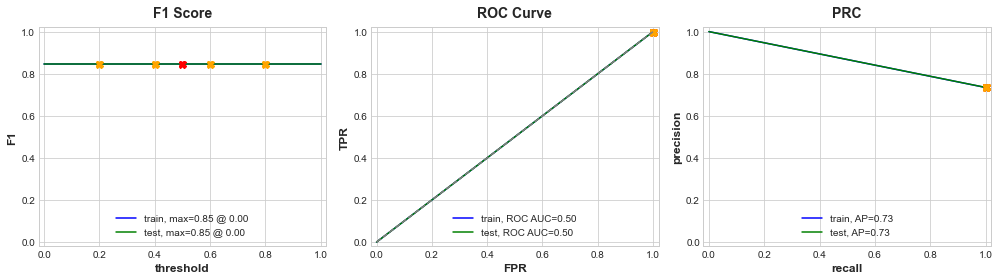

In [27]:
# dummy model which always predict a review as a positive (returns 1)
dummy_clf = DummyClassifier(strategy="constant", constant=1, random_state=234)
dummy_clf.fit(X_train, y_train)

# evaluate the model
evaluate_model(dummy_clf, X_train, y_train, X_test, y_test)

## Logistic Regression
Since this model does not have hyperparameters, we will simply train and test our model.

          train  test
Accuracy   0.75  0.75
F1         0.81  0.81
APS        0.94  0.93
ROC AUC    0.85  0.85


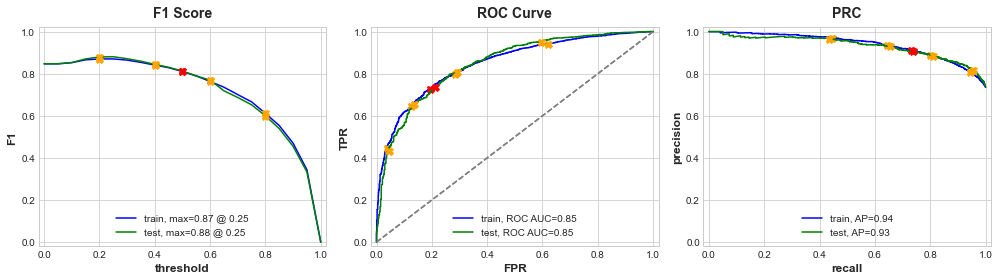

In [28]:
# logistic regression model
log_clf = LogisticRegression(
    solver="liblinear", class_weight="balanced", random_state=234
)
log_clf.fit(X_ohe_train, y_ohe_train)

# evaluate the model
evaluate_model(log_clf, X_ohe_train, y_ohe_train, X_ohe_test, y_ohe_test)

## RandomForest Classifier
The number of trees and their depth are very important, these hyperparameters will be tuned using cross-validation. Then optimal hyperparameters will be used to train and test the final model.

In [29]:
def objective(trial):
    x = X_lab_train
    y = y_lab_train

    rf_max_depth = trial.suggest_int("max_depth", 2, 32)
    rf_n_estimators = trial.suggest_int("n_estimators", 10, 200)
    rf_max_features = trial.suggest_categorical("max_features", ["auto", "sqrt"])
    rf_min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    rf_min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    rf_bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    rf_clf = RandomForestClassifier(
        max_depth=rf_max_depth,
        n_estimators=rf_n_estimators,
        max_features=rf_max_features,
        min_samples_split=rf_min_samples_split,
        min_samples_leaf=rf_min_samples_leaf,
        bootstrap=rf_bootstrap,
        class_weight="balanced",
        random_state=42,
    )

    scores = cross_val_score(rf_clf, x, y, n_jobs=-1, cv=5, scoring="roc_auc")
    roc_auc = scores.mean()
    return roc_auc


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize", study_name="rf_optimization")
    study.optimize(objective, n_trials=100)
    print(f"Optimal parameters for RandomFOrestClassifier are: {study.best_params}.")

Optimal parameters for RandomFOrestClassifier are: {'max_depth': 9, 'n_estimators': 110, 'max_features': 'sqrt', 'min_samples_split': 12, 'min_samples_leaf': 10, 'bootstrap': True}.


          train  test
Accuracy   0.80  0.77
F1         0.85  0.83
APS        0.96  0.94
ROC AUC    0.90  0.85


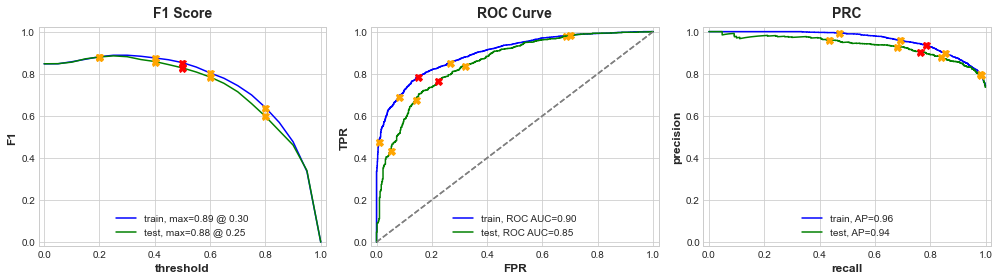

In [30]:
# construct a final model using optimal params
rf_model = RandomForestClassifier(
    class_weight="balanced", random_state=234, **study.best_params
)

# train the model
rf_model.fit(X_lab_train, y_lab_train)

# evaluate the model
evaluate_model(rf_model, X_lab_train, y_lab_train, X_lab_test, y_lab_test)

## LightGBM Classifier 
Lightgbm has many parameters to tune, but for the sake of simplicity, we will only tune "learning rate" and "max_leaves" parameters using cross_validation.
Moreover, Lightgbm can handle categorical features, we simply need to convert their data type from `object` to `categorical`.

In [31]:
# convert objec ttype to category
X_train = X_train.astype(
    {
        "type": "category",
        "payment_method": "category",
        "internet_service": "category",
        "gender": "category",
    }
)
X_test = X_test.astype(
    {
        "type": "category",
        "payment_method": "category",
        "internet_service": "category",
        "gender": "category",
    }
)

In [32]:
def objective(trial):
    x = X_train
    y = y_train

    # params we are going to search
    lgb_num_leaves = trial.suggest_int("num_leaves", 5, 100)
    lgb_max_depth = trial.suggest_int("max_depth", 10, 200)
    lgb_learning_rate = trial.suggest_float("learning_rate", 0.01, 0.5)
    lgb_n_estimators = trial.suggest_int("n_estimators", 50, 250)
    lgb_min_child_samples = trial.suggest_int("min_child_samples", 1, 50)

    # construct lgbm classifier
    lgbm_clf = LGBMClassifier(
        num_leaves=lgb_num_leaves,
        max_depth=lgb_max_depth,
        learning_rate=lgb_learning_rate,
        n_estimators=lgb_n_estimators,
        min_child_samples=lgb_min_child_samples,
        class_weight="balanced",
        random_state=234,
    )

    scores = cross_val_score(lgbm_clf, x, y, n_jobs=-1, cv=5, scoring="roc_auc")
    roc_auc = scores.mean()
    return roc_auc


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize", study_name="lgbm_optimization")
    study.optimize(objective, n_trials=100)
    print(f"Optimal parameters for LGBMClassifier are: {study.best_params}.")

Optimal parameters for LGBMClassifier are: {'num_leaves': 5, 'max_depth': 115, 'learning_rate': 0.182811437073162, 'n_estimators': 224, 'min_child_samples': 21}.


          train  test
Accuracy   0.87  0.79
F1         0.91  0.85
APS        0.99  0.95
ROC AUC    0.96  0.87


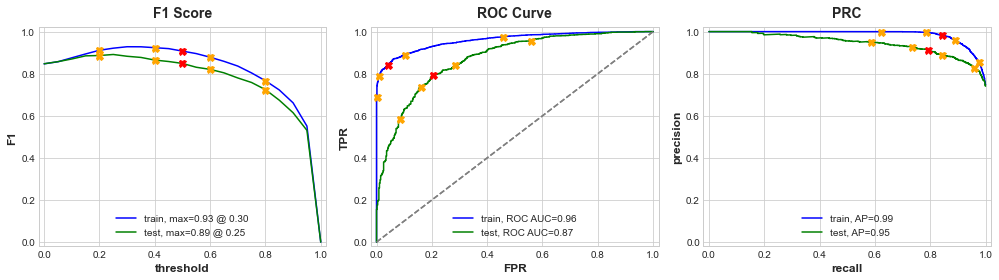

In [33]:
# final lgbm calssififer with optimal params
lgbm_model = LGBMClassifier(
    class_weight="balanced",
    random_state=234,  # **study.best_params
)
lgbm_model.fit(X_train, y_train)

# evaluate the model
evaluate_model(lgbm_model, X_train, y_train, X_test, y_test)

## Conclusion
We have trained and tested three different models, namely **LogisticRegression, RandomForestClassifier, and LightGBMClassifier**. The sanity of models compared with a constant model, which always predicts a customer as still using. Below is the overal performances of the models are presented (scores were obtained from testing set):

|Model                  |Accuracy  | F1   | ROC-AUC | Hyperparams                             | Remarks       |
|-----------------------|----------|------|---------|-----------------------------------------|---------------|
|Constant               |0.75      |0.85  |0.50     |NA                                       |               |
|LogisticRegression     |0.75      |0.81  |0.85     |NA                                       | Perfect fit   |
|RandomForestClassifier |0.78      |0.84  |0.85     | Optimized                               | Little Overfit|
|LightGBMClasffieri     |0.79      |0.85  |0.87     | Optimzied                               | Highly Overfit|

RandomForest and LightGBM are overfitting (high score on the training set, but on testing not that much). We tried different model complexities. But they are still overfitting, this might be due to the smaller dataset.

# Feature importances
What features do mostly influence our models?! Each model used a different algorithm, therefore we might see that one feature has higher importance in one model, but in another, it does not have such an influence.

## Logistic regression feature importance

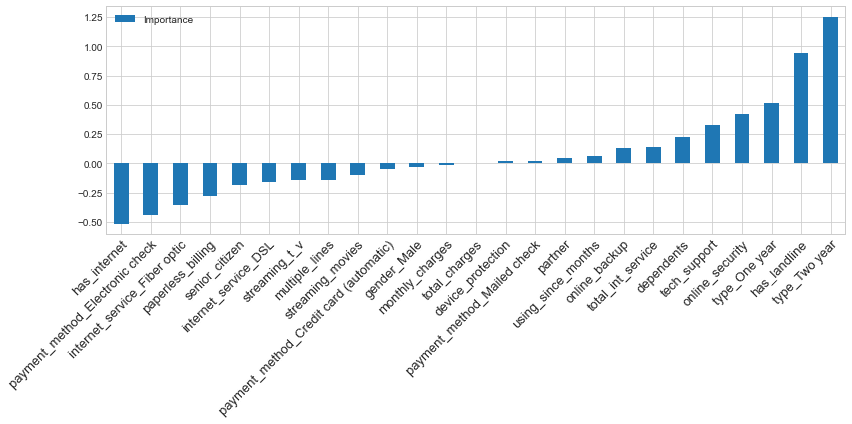

In [34]:
# get importance for logistic regression
log_model_importance = pd.DataFrame(
    log_clf.coef_[0], index=X_ohe_train.columns, columns=["Importance"]
)

# plot the chart
log_model_importance.sort_values(by="Importance").plot(kind="bar", figsize=(12, 6))
plt.xticks(rotation=45, ha="right", rotation_mode="anchor", fontsize=13)
plt.show()

Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

For example, **the `type_Two year` column has the highest positive impact, which mostly defines that customer with class=1 (still using)**. According to this, we need to prepare plans, which will convince the customer to make a long-term contract (such as a two-year contract). Another fact that **who has internet are most likely to leave**, which means either our internet speed is not good enough, or price should be made competitive. These two results are quite consistent without findings in EDA part.

## RandomForest feature importance

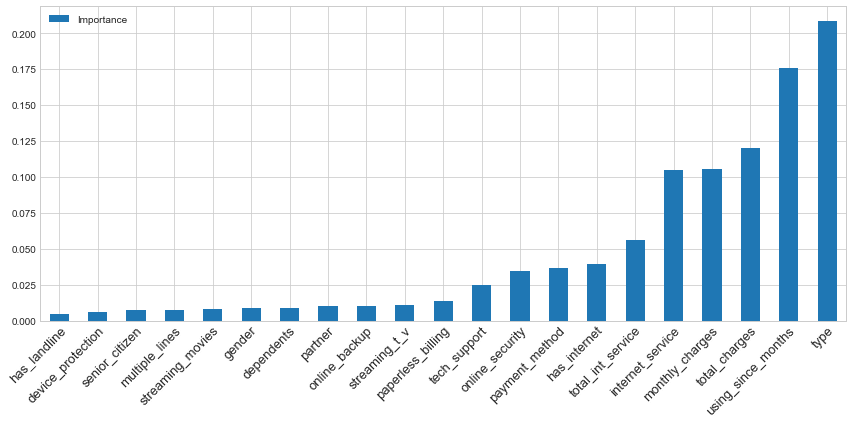

In [35]:
# get importance for randomforest
rf_model_importance = pd.DataFrame(
    rf_model.feature_importances_, index=X_lab_train.columns, columns=["Importance"]
)

# plot the importance chart
rf_model_importance.sort_values(by="Importance").plot(kind="bar", figsize=(12, 6))
plt.xticks(rotation=45, ha="right", rotation_mode="anchor", fontsize=13)
plt.show()

With RandomForest Classifier, we see again that **contract type has highest importance**. Also, **lifetime of customers (`using_since_months`), monthly charegs and total chagres are all has high influence**. All are again in consistent with the EDA part, that mostly fresh customers, who pays high monthly charegs have a higher tendency to churn.

## LGBM feature importance

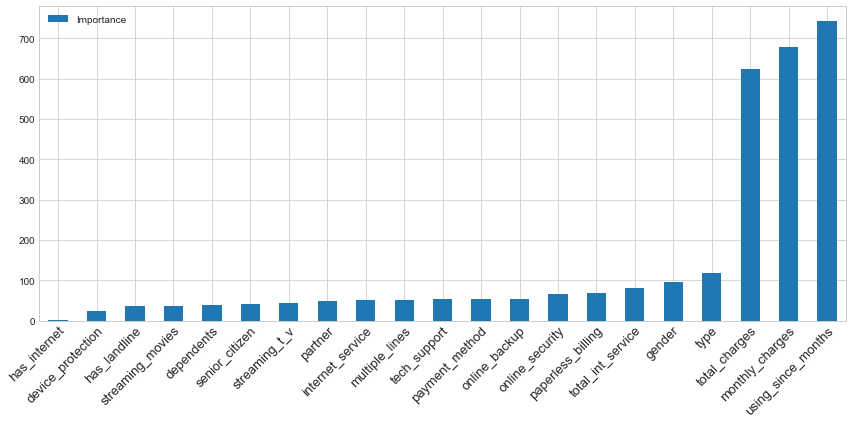

In [36]:
# get importance for lgbm
lgbm_model_importance = pd.DataFrame(
    lgbm_model.feature_importances_, index=X_train.columns, columns=["Importance"]
)

# plot the importance chart
lgbm_model_importance.sort_values(by="Importance").plot(kind="bar", figsize=(12, 6))
plt.xticks(rotation=45, ha="right", rotation_mode="anchor", fontsize=13)
plt.show()

According to the LGBM model, contrary to the previous two models, contract type does not have much effect. But similar to the RandomForest model, lifetime (`using_since_month` column) has a high influence. Also, the amount of monthly and total charges also play a great role in order to determine the class of a customer.

# Summary

- Datasets have been loaded successfully and following modifications were done:
    - Name of columns have been edited
    - Data type of several columns have been changed
    - 4 new features were created
    - all four data frames have been merged into one
    
- During the EDA, following observations have been made:
    - most of the churned customers are in the higher monthly payment range
    - more fresh customers are more likelt to churn
    - most of the customers are using the month-to-month contract type
    - on month-to-month contract type, the number of churned and still using customers is almost the same
    - customers who are still using or have already left, we see that their numbers differ almost 3 folds. That means, our project is an imbalanced classification task
    - we are losing more internet using-customers
    - a lot of customers use one or more of the internet services** (4 times more than the customer without internet)
    - customers using one or more internet services on average pay almost 4 times more than customers who do not use internet services

- We have trained and tested three different models, namely **LogisticRegression, RandomForestClassifier, and LightGBMClassifier**. The sanity of models compared with a constant model. The overal performances of the models are as following:
    - RandomForest and LightGBM are slightly overfitting (high score on the training set, but on testing not that much). we tried different model complexities. But they are still overfitting, this might be due to the smaller dataset.

|Model                  |Accuracy  | F1   | ROC-AUC | Hyperparams                             | Remarks       |
|-----------------------|----------|------|---------|-----------------------------------------|---------------|
|Constant               |0.75      |0.85  |0.50     |NA                                       |               |
|LogisticRegression     |0.75      |0.81  |0.85     |NA                                       | Perfect fit   |
|RandomForestClassifier |0.78      |0.84  |0.85     | Optimized                               | Little Overfit|
|LightGBMClasffieri     |0.79      |0.85  |0.87     | Optimzied                               | Highly Overfit|
    

- Making data ready for ML:
    - Depending on the algorithm, categorical columns were encoded
    - All three version of data has been split into training and testing sets, using stratification

- Feature importance charts:
    - Logistic regression: The customers with two-year contrcat has the highest positive impact, which mostly defines customers more likely to continue to use the operator. Another fact is hat, who has internet are most likely to leave, which means either our internet speed is not good enough, or price should be made competitive
    - RandomForest: contract type has highest importance. Also, lifetime of customers, monthly charegs and total chagres are all has high influence.
    - LGBM model, contrary to the previous two models, contract type does not have that much effect. But similar to the RandomForest model, lifetime has a high influence. We should be careful especially in the fist monthes of new customer.
    
**A model based on LigthGBM algorithm, has highest score to predict a customer who has a higher tendency to leave, with ROC AUC score of 0.87.**

## Suggestions
Based on EDA and feature importance analysis following story can be derived from:
**A customer comes to the Interconnect before he signs a long-term contract, he wants to be sure that the operator matches his expectations. So he signs a month-to-month contract. Most likely, he tries internet services. Consequently, he pays a lot of money, because of the internet and maybe a short-term contract. But then something goes wrong: either customer is not satisfied with performance per price or the performance per price of the operator is not competitive/attractive. Finally, he decides to quit in the early months of the contract.**

- Customers mostly chrun in their first months, plans persuade them for long-term cuntracts may be useful to keep them.
- Monthly charegs, which is highly dependent on internet, is also critical for customers. We should check internet performance per price indicator and make it competitive/attractive.